<a href="https://colab.research.google.com/github/vodindo/Autolib-Electric-Car-/blob/main/Autolib_Electric_Car_Company_Independent_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Defining the question

a) Specifying the Data Analytic Question: 

Problem Statement 

Investigate a claim about the blue cars from the autolib dataset.

Null hypothesis: the average number of blue cars taken is not different than that of the blue cars returned

Alternative hypothesis: the average number of blue cars taken is different than that of the blue cars returned(Claim:)



b) Defining the Metric for Success

The aim of the analysis is to investigate the claim described above and knowing whether or not the the average number of blue cars taken is different that of the blue cars returned

Concluding on a hypothesis test given a 95% confidence interval

c) Understanding the context

As a Data Scientist for the Autolib electric car-sharing service company I will be investigating the claim about the blue cars from the provided Autolib dataset. In an effort to do this, I will identify some areas and periods of interest via sampling stating the reason to the choice of method, then perform hypothesis testing with regards to the claim that will be made.

d) Recording the Experimental Design

Defining the research question

Finding and dealing with outliers, anomalies, and missing data within the dataset.

Plot appropriate univariate and bivariate summaries recording the observations.

Implement the solution by performing hypothesis testing.

Challenge the solution by providing insights on the improvements that can be made 

e) Relevance of the data

The data that was used for survey was obtained from an open datasource. The provided dataset is a daily aggregation, by date and postal code, of the number of events on the Autolib network. The dataset used ranged from January to July of 2018 and will be deemed relevant for this analysis

Data Exploratory

In [33]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, StratifiedKFold

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.simplefilter('ignore')

In [32]:
# Importing our files

# Lets import the description table for the columns in our file

description = pd.read_excel('columns_explanation.xlsx')
description

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


In [31]:
# Reading the data
url = 'http://bit.ly/DSCoreAutolibDataset'
df = pd.read_csv(url)
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [30]:
df.tail()

,postal code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [29]:
# Checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayofweek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   bluecars_taken_sum      16085 non-null  int64 
 6   bluecars_returned_sum   16085 non-null  int64 
 7   utilib_taken_sum        16085 non-null  int64 
 8   utilib_returned_sum     16085 non-null  int64 
 9   utilib_14_taken_sum     16085 non-null  int64 
 10  utilib_14_returned_sum  16085 non-null  int64 
 11  slots_freed_sum         16085 non-null  int64 
 12  slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [28]:
df.columns

Index(['postal code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

In [27]:
# Validating 
# Map the lowering function to all column names

df.columns = map(str.lower, df.columns)
df

,postal code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


In [18]:
# Checking for Outliers
#
#cheaking outliers and removing
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)  
IQR = Q3 - Q1
# Removing outliers based on the IQR range and stores the result in the data frame 'df_out'

df1 = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
# Printing the shape of our new dataset

print(df1.shape)

(9783, 13)


In [23]:
# Printing the shape of the old dataset

print(df.shape)

(16085, 13)


In [24]:
# Checking for duplicates
df1.duplicated().any()

False

In [25]:
# Checking for missing values
df1.isnull().any()

Postal code               False
date                      False
n_daily_data_points       False
dayOfWeek                 False
day_type                  False
BlueCars_taken_sum        False
BlueCars_returned_sum     False
Utilib_taken_sum          False
Utilib_returned_sum       False
Utilib_14_taken_sum       False
Utilib_14_returned_sum    False
Slots_freed_sum           False
Slots_taken_sum           False
dtype: bool

In [26]:
# Checking for Unique values 
df1.nunique()

Postal code                79
date                      130
n_daily_data_points         3
dayOfWeek                   7
day_type                    2
BlueCars_taken_sum        275
BlueCars_returned_sum     269
Utilib_taken_sum           11
Utilib_returned_sum        11
Utilib_14_taken_sum        24
Utilib_14_returned_sum     24
Slots_freed_sum            13
Slots_taken_sum            13
dtype: int64

Exploratory Analysis 

In [35]:
#columns name
df1.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [36]:
# Categorizing colums
num_cols =['postal_code','n_daily_data_points','dayofweek','bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum']

In [82]:
df1.drop(['date', 'n_daily_data_points', 'utilib_taken_sum', 'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum', 'slots_freed_sum', 'slots_taken_sum'], inplace=True)
df1

KeyError: ignored

In [59]:
df1.drop(columns=['date'],inplace=True)
df1


,Postal code,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
3899,91330,1440,0,weekday,19,9,0,0,0,0,4,2
3900,91330,1438,1,weekday,10,10,0,0,0,0,0,0
3901,91330,1439,2,weekday,11,13,0,0,0,0,1,1
3903,91330,1440,4,weekday,10,6,0,0,0,0,1,1
3905,91330,1440,6,weekend,28,17,0,0,1,1,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...
16079,95880,1439,3,weekday,15,13,0,0,0,0,0,0
16080,95880,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,1440,6,weekend,33,35,1,1,0,0,0,0


In [38]:
df1.sample(5)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
5253,92140,4/22/2018,1440,6,weekend,81,81,6,3,5,8,0,0
15373,94700,3/13/2018,1440,1,weekday,19,20,0,0,3,1,0,0
8265,92360,1/10/2018,1440,2,weekday,12,13,0,0,0,0,0,0
5623,92170,1/11/2018,1440,3,weekday,56,51,1,1,0,1,0,0
15558,94800,4/11/2018,1439,2,weekday,66,79,2,2,4,6,0,0


In [39]:
# Getting day type data
df2 = df1[df1.day_type == 'weekend']

In [40]:
df2.sample(5)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
14130,94160,3/17/2018,1440,5,weekend,78,72,0,1,11,12,7,7
8120,92350,1/21/2018,1440,6,weekend,26,23,0,1,3,2,0,0
9065,92410,2/3/2018,1438,5,weekend,14,16,2,2,0,0,0,0
4744,92110,3/11/2018,1440,6,weekend,23,20,0,1,2,1,0,0
9838,92800,1/28/2018,1440,6,weekend,112,128,0,0,7,4,9,9


Given that a selection of the days is required, weekend will be preferred for this case 

In [41]:
df2.shape

(2963, 13)

In [42]:
df2.nunique()

Postal code                79
date                       40
n_daily_data_points         3
dayOfWeek                   2
day_type                    1
BlueCars_taken_sum        241
BlueCars_returned_sum     234
Utilib_taken_sum           11
Utilib_returned_sum        11
Utilib_14_taken_sum        23
Utilib_14_returned_sum     23
Slots_freed_sum            13
Slots_taken_sum            13
dtype: int64

Univariate Analysis 

In [43]:
#Description of all the numerical data columns
Auto_num = df2.describe()
Auto_num

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000
mean,93112.126223,1439.825177,5.527843,57.718529,57.354708,1.742153,1.734391,4.143098,4.129261,0.768815,0.748228
std,1015.852872,0.493524,0.499308,48.991550,49.600634,2.063558,2.080906,4.132647,4.197661,2.029545,1.990200
min,91330.000000,1438.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,92270.000000,1440.000000,5.000000,21.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,93110.000000,1440.000000,6.000000,43.000000,42.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,94100.000000,1440.000000,6.000000,82.000000,82.000000,3.000000,3.000000,6.000000,6.000000,0.000000,0.000000
max,95880.000000,1440.000000,6.000000,293.000000,301.000000,10.000000,10.000000,22.000000,22.000000,12.000000,12.000000


Text(0.5, 1.0, 'Distribution of blue cars taken')

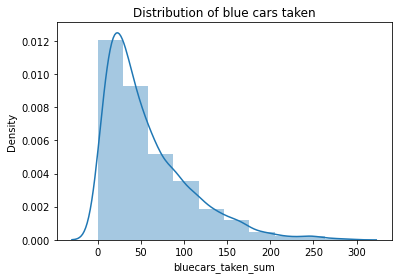

In [25]:
# Plot Bluecars taken
sns.distplot(df2['bluecars_taken_sum'], bins=10)
plt.title('Distribution of blue cars taken')

Text(0.5, 1.0, 'Distribution of blue cars returned')

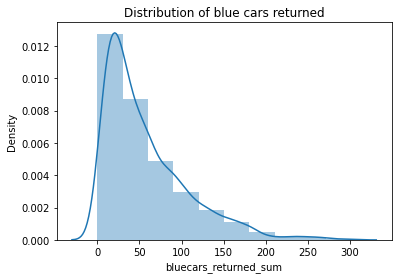

In [26]:
# Plot Bluecars returned 
sns.distplot(df2['bluecars_returned_sum'], bins=10)
plt.title('Distribution of blue cars returned')

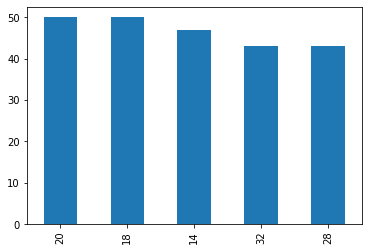

In [27]:
df2['bluecars_taken_sum'].value_counts().head().plot.bar()

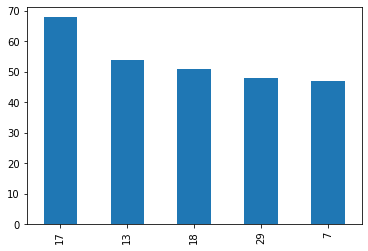

In [28]:
df2['bluecars_returned_sum'].value_counts().head().plot.bar()

Measures of Dispersion 

Inter-Quartile Range 

In [29]:
# Finding the quantiles 
df2["bluecars_taken_sum"].quantile([0.25,0.5,0.75])

0.25    21.0
0.50    43.0
0.75    82.0
Name: bluecars_taken_sum, dtype: float64

In [30]:
# Finding the quantiles of the herbicide average prices
df2["bluecars_returned_sum"].quantile([0.25,0.5,0.75])

0.25    20.0
0.50    42.0
0.75    82.0
Name: bluecars_returned_sum, dtype: float64

Skewness

In [31]:
# Determining the skeweness
df2["bluecars_taken_sum"].skew()

1.4545842683094052

In [32]:
# Determining the skeweness
df2["bluecars_returned_sum"].skew()

1.4736761388221948


Kurtosis


In [33]:
# Determining the Kurtosis 
df2["bluecars_taken_sum"].kurt()

2.3062027382314136

In [34]:
# Determining the Kurtosis 
df2["bluecars_returned_sum"].kurt()

2.3762813419284834

Bivariate Analysis 

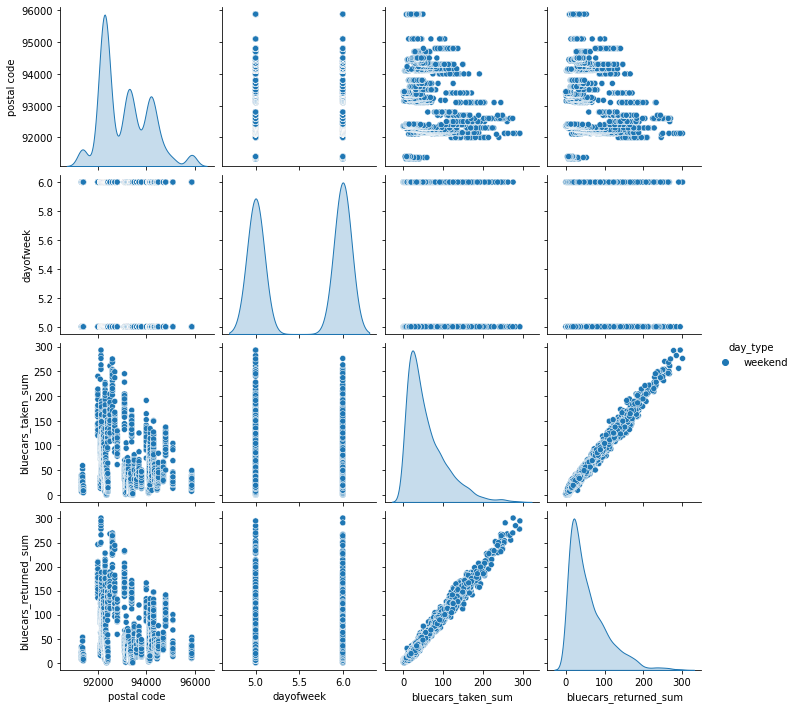

In [35]:
#Ploting the bivariate summaries and recording our observations

sns.pairplot(df2,hue = 'day_type')

In [36]:
# Calculating the pearson coefficient
#
# Checking whether you have to define the pearson
coeff = df2["bluecars_returned_sum"].corr(df2["bluecars_taken_sum"]) 
print(coeff)

0.9906487464480561


Text(0.5, 1.0, 'bluecars_returned_sum vs bluecars_taken_sum')

Text(0.5, 0, 'bluecars_returned_sum')

Text(0, 0.5, 'bluecars_taken_sum')

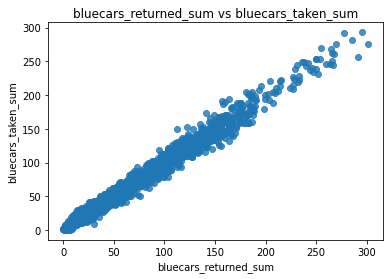

In [37]:
# Using Seaborn: Using the function regplot to create our scatterplot
sns.regplot(x = df2["bluecars_returned_sum"], y = df2["bluecars_taken_sum"], fit_reg=False)
# Giving our scatterplot a title
plt.title('bluecars_returned_sum vs bluecars_taken_sum')

# Labelling our x axis
plt.xlabel('bluecars_returned_sum')

# Labelling our y axis
plt.ylabel('bluecars_taken_sum')

# Displaying our scatterplot
plt.show()

From the graph and pearson coefficient, there is a strong positive correlation between the blue cars taken and returned 

<Figure size 936x864 with 0 Axes>

Text(0.5, 1.0, 'Heatmap showing Correlation of the Numerical Columns')

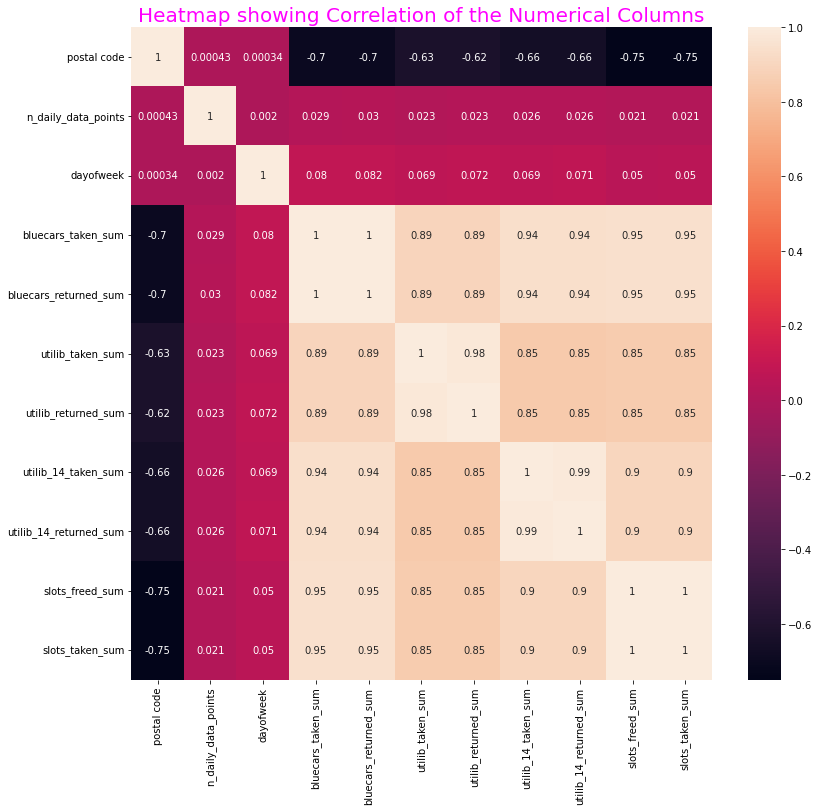

In [38]:
# heatmap to visualise features with linear relationships 
plt.figure(figsize = (13, 12))
sns.heatmap(df.corr(), annot=True, );
plt.title('Heatmap showing Correlation of the Numerical Columns', color = 'magenta', fontsize = 20)

Multivariate Analysis; Linear Discriminant Analysis

In [83]:
# Dividing the lables and feature set
X = df.iloc[:, 0:12].values
y = df.iloc[:, 12].values

In [84]:
# Dividing the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [95]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

ValueError: ignored

In [63]:
# Performing LDA 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

ValueError: ignored

In [64]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

ValueError: ignored

In [74]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

NameError: ignored

Hypothesis Testing 

In [ ]:
## H0 Null hypothesis: 
      # The average number of blue cars taken is not different that of the blue cars returned?
## HA Alternative hypothesis:  
      # The average number of blue cars taken is different that of the blue cars returned(Claim)
# Set Significance Level
#α=0.05
#Select the appropriate statistical test
# What type of variable is the "input"?
# The input is categorical, number of blue cars taken is different from that returned

# What type of variable is the "response"?
# The response is "number," which is a continuous value
# Hence we will use the Anderson darling test 
# We first test for Normality 

In [40]:
df2.columns

Index(['postal code', 'dayofweek', 'day_type', 'bluecars_taken_sum',
       'bluecars_returned_sum'],
      dtype='object')

In [41]:
df2.dtypes

postal code               int64
dayofweek                 int64
day_type                 object
bluecars_taken_sum        int64
bluecars_returned_sum     int64
dtype: object

In [42]:
df2.drop(['day_type'], axis=1, inplace=True)
df2

,postal code,dayofweek,bluecars_taken_sum,bluecars_returned_sum
3905,91330,6,28,17
3911,91330,5,24,21
3912,91330,6,27,30
3918,91330,5,16,10
3919,91330,6,18,14
...,...,...,...,...
16068,95880,6,36,33
16074,95880,5,15,15
16075,95880,6,34,32
16081,95880,5,19,19


Normality Test 

In [43]:
import scipy.stats as stats
from scipy.stats import shapiro

def shapiro_test(df2, col_list):
    for x in col_list:
        print(x)
        data = df2[x]
        stat, p = shapiro(data)
        print('Statistics=%.3f, p=%.3f' % (stat, p))
        # interpret
        alpha = 0.05
        if p > alpha:
            print('Sample looks Gaussian (fail to reject H0)')
        else:
            print('Sample does not look Gaussian (reject H0)')
        print('\n')

In [44]:
#Shapiro Wilk's test
shapiro_test(df2, list(df2.columns))

postal code
Statistics=0.927, p=0.000
Sample does not look Gaussian (reject H0)


dayofweek
Statistics=0.635, p=0.000
Sample does not look Gaussian (reject H0)


bluecars_taken_sum
Statistics=0.869, p=0.000
Sample does not look Gaussian (reject H0)


bluecars_returned_sum
Statistics=0.863, p=0.000
Sample does not look Gaussian (reject H0)




In [45]:
stats.shapiro(df2['bluecars_taken_sum'])

(0.8685535788536072, 1.6815581571897805e-44)

In [46]:
stats.shapiro(df2['bluecars_returned_sum'])

(0.8628714680671692, 4.203895392974451e-45)

Since the p-value < .05, we reject the null hypothesis that the data is normal. Therefore, we cannot use the Parametric One-Way ANOVA. The appropriate statistical test in this case is the Kruskal Wallis test to test whether the distributions are significantly different.

In [47]:
stats.kruskal(df2['bluecars_taken_sum'],df2['bluecars_returned_sum'],)

KruskalResult(statistic=0.6212875062685868, pvalue=0.4305692426611628)

Since the p-value > 0.05, so we fail to reject the null hypothesis and hence there is no enough stastical evidence to reject the null hypothesis

Sampling 

Stratified Sampling will be used to group the data into different sets of strata and then randomly pick a sample from the strata

In [48]:
# Stratified sample
df3 = df2.groupby('dayofweek', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))
df3

,postal code,dayofweek,bluecars_taken_sum,bluecars_returned_sum
13378,94110,5,49,51
5671,92170,5,77,82
7013,92260,5,24,25
13853,94140,5,71,68
10344,93130,5,26,22
...,...,...,...,...
4955,92120,6,79,83
9877,92800,6,81,87
15874,95870,6,18,14
15860,95870,6,16,19


In [49]:
# Population mean
a = df['bluecars_taken_sum'].mean()
a

125.92695057506994

In [50]:
d = df['bluecars_returned_sum'].mean()
d

125.912713708424

In [51]:
# Sample mean
b = df3['bluecars_taken_sum'].mean()
b

57.101351351351354

In [52]:
e = df3['bluecars_returned_sum'].mean()
e

56.45945945945946

In [53]:
# sample standard deviation
c = df3['bluecars_taken_sum'].std()
c

48.232591817379

In [54]:
# Calculating the z-score
zscore = (b-a) / c
zscore

-1.4269521215925944

In [55]:
# P value
from scipy.stats import norm
pro = stats.norm.cdf(zscore)
pro

0.07679684782716949

In [56]:
#interpretation of the p value
if pro < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we fail to reject null hypothesis")

we fail to reject null hypothesis


In [57]:
# Point estimation
# population.mean() - sample.mean()
# we will use the mean for the blue cars that were taken

df['bluecars_taken_sum'].mean() - df3['bluecars_taken_sum'].mean()

68.82559922371858

In [64]:
#Interval Estimation 
# Calculating the sample mean of final data
#
a

# Finding the sample size
#
sample_size = df3.shape[0]
sample_size

# Finding the standard error of the mean of data 
#
std_error = df3.std() / np.sqrt(sample_size)
std_error

# Calculating the 95% Confidence Interval for mean data 
# To calculate the confidence interval, we will use the norm object from the statssubpackage. 
# The norm object has an interval() method that receives three inputs 
# – our chosen confidence interval 0.95, and the sample mean and standard error of the mean.  
# 
stats.norm.interval(0.95, loc=a, scale=std_error)




125.92695057506994

296

postal code              58.879454
dayofweek                 0.029069
bluecars_taken_sum        2.803462
bluecars_returned_sum     2.855650
dtype: float64

(array([ 10.52534053, 125.86997723, 120.43226513, 120.32997987]),
 array([241.32856062, 125.98392392, 131.42163602, 131.52392128]))

In [59]:
import math
sample_mean = df3['bluecars_taken_sum'].mean()

z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*

print("z-critical value:")              # Check the z-critical value
print(z_critical)                        

pop_stdev = df['bluecars_taken_sum'].std()  # Get the population standard deviation

margin_of_error = z_critical * (pop_stdev/math.sqrt(296))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

z-critical value:
1.959963984540054
Confidence interval:
(35.977445612008815, 78.2252570906939)
